# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #1
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 2nd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random

## Problem 1: Bayes Theorem

**Coding not required**

### Part A:
Your child has been randomly selected for Type I diabetes screening, using a highly accurate new test that boasts of a false positive rate of 1% and a false negative rate of 0%. The prevalence of of Type I diabetes in children is approximately 0.228%. Should your child test positive, what is the probability that he/she has Type I diabetes?

Should you be concerned enough to ask for further testing or treatment for your child?

Later, you read online that Type I diabetes is 6 times more prevalent in prematurely born children. If this statistic is true, what is the probability that your child, who is prematurely born, has Type I diabetes?

Given the new information, should you be concerned enough to ask for further testing or treatment for your child?

**Justify your decisions using your calculations.**

$D$ - he/she has Type 1 diabetes     

$\overline{D}$ - he/she does not Type 1 diabetes

$P$ - test positive 

$\overline{P}$  - test negative

The prevalence of of Type I diabetes in children is approximately 0.228% $\Rightarrow
P(D) = 0.228$% $\Rightarrow$ $P(\overline{D}) = 1-0.228$% = 0.99772

False positive rate of 1%  $\Rightarrow$ $P(P|\overline{D}) = 1$% $\Rightarrow$ $P(\overline{P}|\overline{D}) = 99$%

False negative rate of 1%  $\Rightarrow$ $P(\overline{P}|D) = 0$% $\Rightarrow$ $P(P|D) = 100$%

Based on Bayes Theorem:

$P(D|P) = \frac{P(P|D)P(D)}{P(P|D)P(D)+P(P|\overline{D})P(\overline{D})} =\frac{1\times0.00228}{1\times 0.00228＋0.01\times0.99772}$ = 0.186 = 18.6%

Further treatment should not be concerned enough for the child.

............................................................................................................................................................................................................................................

Since Type I diabetes is 6 times more prevalent in prematurely born children,

$DP$ - prematurely born children have Type I diabetes

P(DP) = 0.228%$\times 6 = 0.01368$  $\Rightarrow$ $P(\overline{DP}) = 1-0.01368 = 0.98632$

$P(DP|P) = \frac{P(P|DP)P(DP)}{P(P|DP)P(DP)+P(P|\overline{DP})P(\overline{DP})} =\frac{1\times0.01368}{1\times 0.01368＋0.01\times0.98632}$ = 0.581 = 58.1%

Further treatment should be concerned enough for the child.







### Part B:

During shopping week, you're trying to decide between two classes based on the criteria that the class must have a lenient grading system. You hear from your friends that one of these classes is rumored to award grades lower than the work merits 35% of the time while the other awards lower grades 15% of the time. However, the rumor doesn't specify which class has harsher grading. So, you decide to conduct an experiment: submit an assignment to be graded. 

Fortunately, both classes offer an optional Homework 0 that is graded as extra credit. Unfortunately, you only have time to complete the problem set for just one of these classes. 

Suppose you randomly pick the Homework 0 from Class A to complete and suppose that you received a grade that you believe is lower than the quality of your work warrents. Based on this evidence, what is the probability that Class A has the harsher grading system? Which class should you drop based on the results of your experiment (or do you not have sufficient evidence to decide)?

**Justify your decisions using your calculations.**

The evidence is not sufficient enough. Let us suppose which class I choose has equal probability (1/2).

Suppose 

$$\text{P(harsh|class_A) = 0.35}$$

$$\text{P(harsh|class_B) = 0.15}$$

Since we have no infomation about the prior (the probability that Class A/B is harsher), we assume the probability is 1/2 for Class A/B.

 $$\text Prior:{P(class_A) = 0.5}$$  
 $$\text Prior: {P(class_B) = 0.5}$$


$$
P(\text{class_A|harsh}) = \frac{P(\text{harsh|class_A})P(\text{class_A)}}{P(\text{harsh|choose_A})P(\text{class_A)}+{P(\text{harsh|class_B})P(\text{class_B)}}}
$$


Hence,$$P(\text{class_A|harsh})=\frac{0.35\times0.5}{0.35\times0.5+0.15\times0.5}=0.7$$

Then, $$P(\text{class_B|harsh})=1-P(\text{class_A|harsh})=0.3$$

Therefore, Class A is harsher and we need to drop Class A


## Problem 2: Maximum Likelihood Estimates

**Coding required for Part B only**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

### Part A:


What are the values for $\lambda_0$ and $\lambda_1$ that maximizes the likelihood of the observed data? 

**Support your answer with full and rigorous analytic derivations.**

### Part B:

Visualize the data along with the distribution you determined in part A (in two dimensions or three).

### Solution to Part A:
$$\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$$

Integrate $f_X(\mathbf{x})$ over its entire defined space and set that integral equal to one, we can find a relation between λ0 and λ1:

$$
\iint{f_X(\mathbf{x})dx_1dx_2} = 1
$$

In polar coordinate system：

$$
x_1 = Rsin(\theta)$$

$$x_2 = Rcos(\theta)
$$

$$r = \sqrt{x_1^{2}+x_2^{2}}
$$
$f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ 

$$r\ge 0$$

$$40\le\theta\le\pi/2$$

$$
\int_0^{+\infty}\int_0^{+\infty}f_X(\mathbf{x})dx_1dx_2 = \int_0^{+\infty}\int_0^{+\infty}4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}dx_1dx_2 = 1 \Rightarrow \int_0^{\pi/2}\int_0^{+\infty}  4\lambda_1^{2}r^{2}\frac{1}{2}sin(2\theta)exp(-\lambda_0r^{2})r \,d\theta\,dr = 1
$$

$$
\Rightarrow 2\lambda_1^{2}\int_0^{\pi/2}\int_0^{+\infty}r^{2}sin(2\theta)exp(-\lambda_0r^{2})rdrd\theta =2\lambda_1^{2}\int_0^{\pi/2}sin(2\theta)d\theta\int_0^{+\infty}r^{3}exp(-\lambda_0r^{2})dr =2\lambda_1^{2}\int_0^{+\infty}r^{3}exp(-\lambda_0r^{2})dr = \lambda_1^{2}/\lambda_0^{2} = 1
$$

Assume that $\lambda_1, \lambda_0 > 0$,

hence $$\lambda_1 = \lambda_0=\lambda $$

$$
L(\lambda) = \prod_{i=1}^n P(x_i \mid \lambda) =\sum_{i=0}^n ln(P(x_i \mid \lambda))$$ $$= \sum_{i=0}^n ln\left\{( 4\lambda^2 x_{1}^{(i)}x_{2}^{(i)} \mathrm{exp} (-\lambda (x^{(i)2}_{1} + x^{(i)2}_{2}) \right\} =4ln4+4ln(\lambda^{2})+\sum_{i=0}^nln(x_1^{i}x_2^{i})-\sum_{i=0}^n\lambda(x_1^{(i)2}+x_2^{(i)2})\propto8ln(\lambda)-\sum_{i=0}^n\lambda(x_1^{(i)2}+x_2^{(i)2})
$$

$$
\frac{d \ell}{d\lambda} = \frac{8}{\lambda} - \sum_{i=0}^n(x_1^{(i)2}+x_2^{(i)2}) = 0
$$

$$\lambda=\lambda_1 = \lambda_0=\frac{8}{161}\approx 0.05 $$

### Solution to Part B:

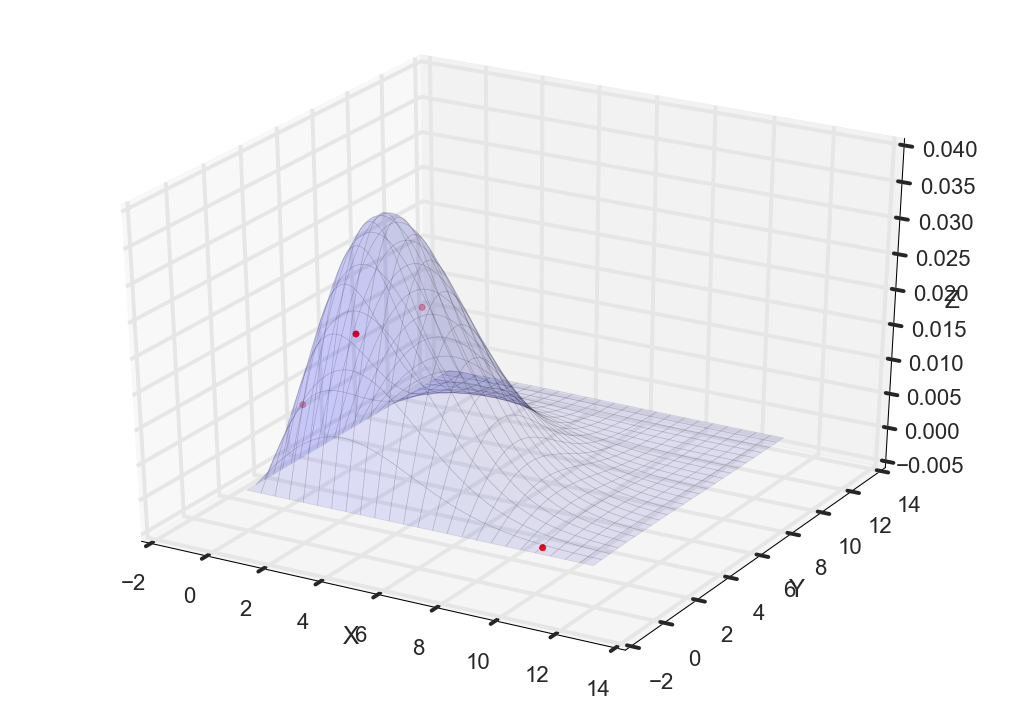

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x1, x2):
    L1 = 0.05
    L0 = 0.05
    return (4*(L1**2)*x1*x2*np.exp(-L0*(x1**2+x2**2)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0,12,0.05)
y = np.arange(0,12,0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


xcod = [0.5,3.2,2.72,10.047]
ycod = [2.5,1.3,5.84,0.354]
zcod = [fun(0.5,2.5),fun(3.2,1.3),fun(2.72,5.84), fun(10.047,0.354)]

sc = ax.scatter(xcod,ycod,zcod,color ='r')
ax.plot_surface(X, Y, Z,alpha = 0.1)

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plt.show()

## Problem 3: Frequentist Stats
**Coding required**

Read the data set contained in `Homework_0_Data.txt`. Each data point is a two-dimensional vector, $\mathbf{x} = (x_1, x_2)$.

### Part (A): Visualization and Interpretation

- Make a 2-D visualization the distribution of the data. 

- Visualize the the pdf, $f_X$, of the underlying distribution of the data.

- Visualize the distribution defined by $f_{{x}_2 | {x}_1}$ for ${x}_1 \in [3.99, 4.01]$.

- Visualize the distribution defined by $f_{{x}_1}$.


### Part (B): Esimatation

- Empirically estimate the mean of the distribution $f_{{x}_1}$. Estimate, also the SE (standard error) of the estimate.

- Empirically estimate the standard deviation of the distribution $f_{{x}_2 | {x}_1}$, for ${x}_1 \in [3.99, 4.01]$. Estimate, also the SE (standard error) of the estimate.

- Given the SE, How many in your standard deviation estimate are significant? Explain why.

### Solution to  Part (A):


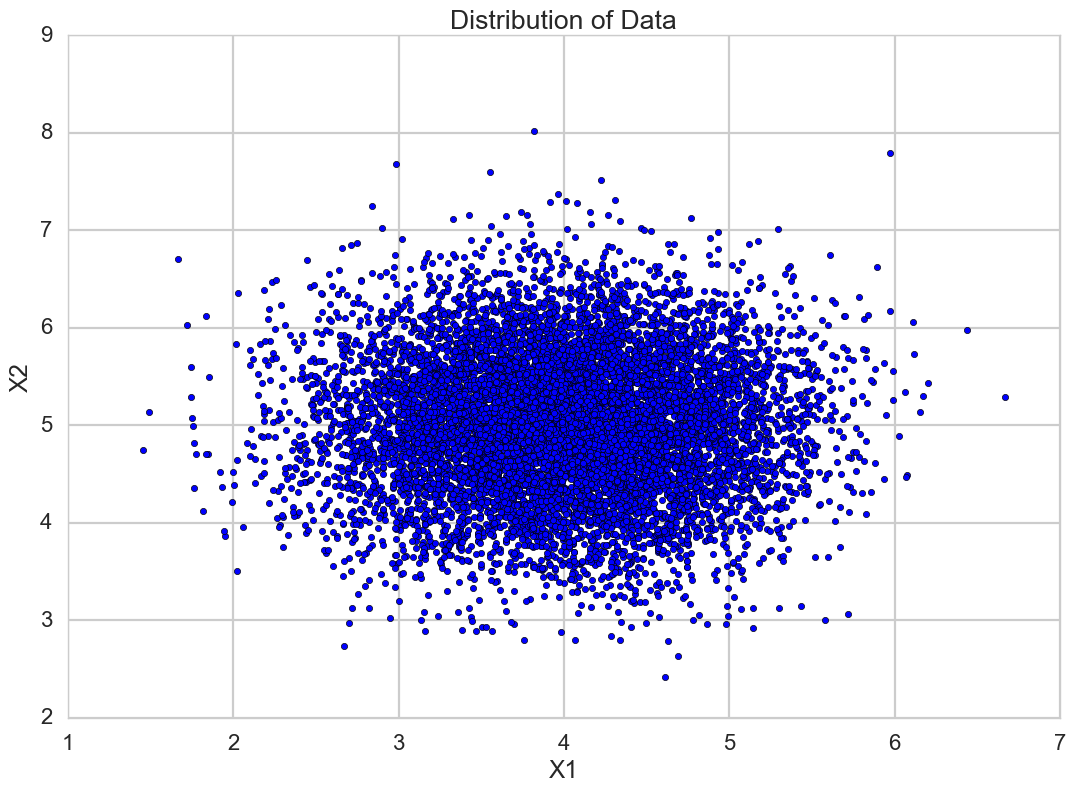

(10000, 2)
3.992763976722131 4.9981463164249345


In [3]:
data = pd.read_table("Homework_1_Data.txt", header=None, sep=',', )
#data.head()
#print(data)
plt.scatter(data[0],data[1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Distribution of Data')
plt.show()
x1 = data[0]
x2 = data[1]
print (data.shape)
x1_grid, x2_grid = np.meshgrid(x1, x2)
#print(x1_grid.shape)
fig = plt.figure()
#print (data.head())

mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
print (mean_x1,mean_x2)

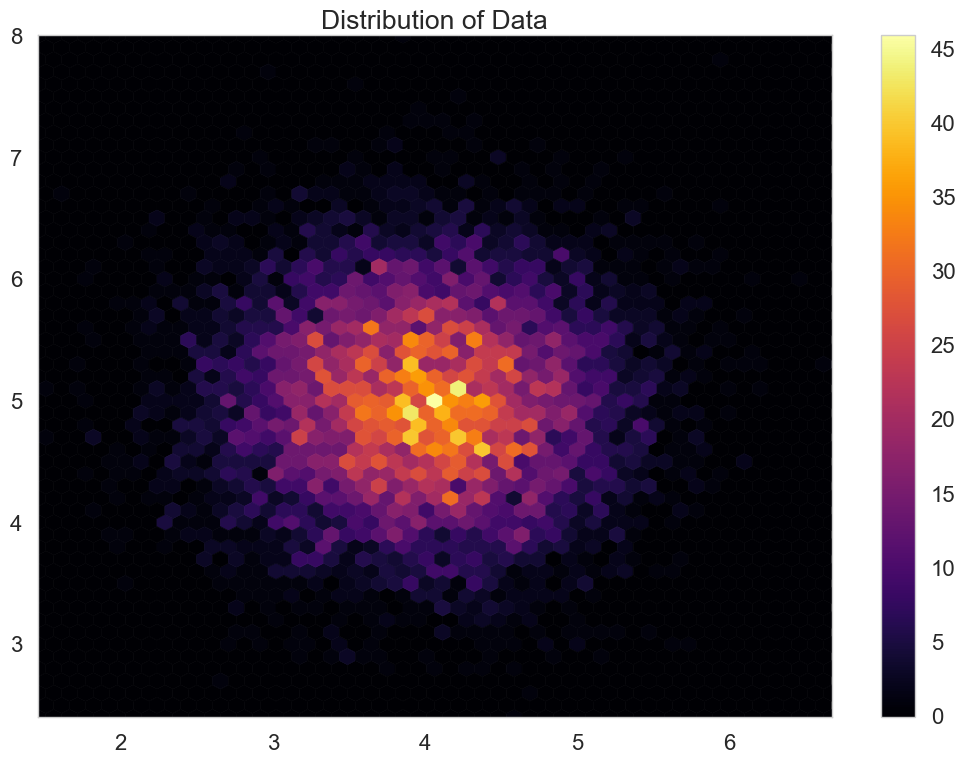

In [4]:
#fig, axs = plt.subplots( figsize=(7, 4))
#fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

plt.hexbin(data[0],data[1],gridsize=50, cmap='inferno')
#cb = fig.colorbar(hb, ax=ax)
cb = plt.colorbar()
#cb.set_label('mean value')
plt.title('Distribution of Data')

/Users/sunyuting/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


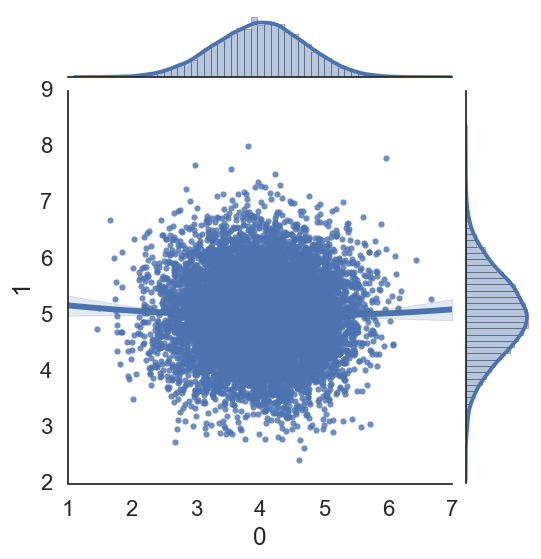

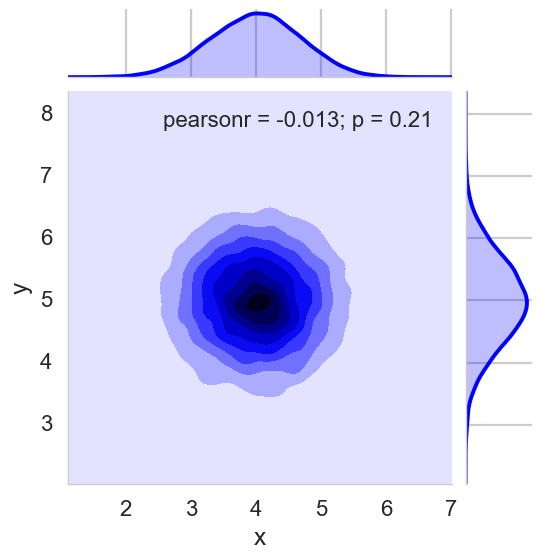

In [5]:
with sns.axes_style("white"):
    #g = sns.jointplot(x=data[0], y=data[1], kind="hex", color="k");
    g = sns.JointGrid(x=data[0], y=data[1])  
    g.plot_joint(sns.regplot, order=2)  
    g.plot_marginals(sns.distplot)  
g = (sns.jointplot(data[0], data[1], color="b",kind="kde").set_axis_labels("x", "y"))

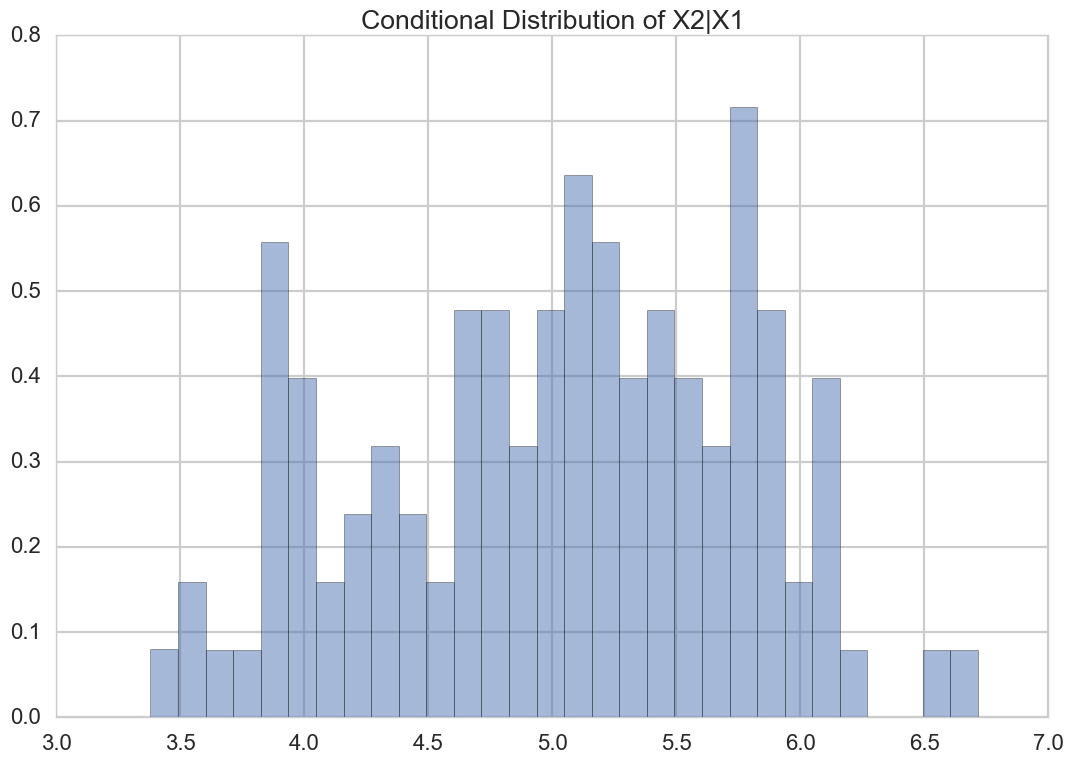

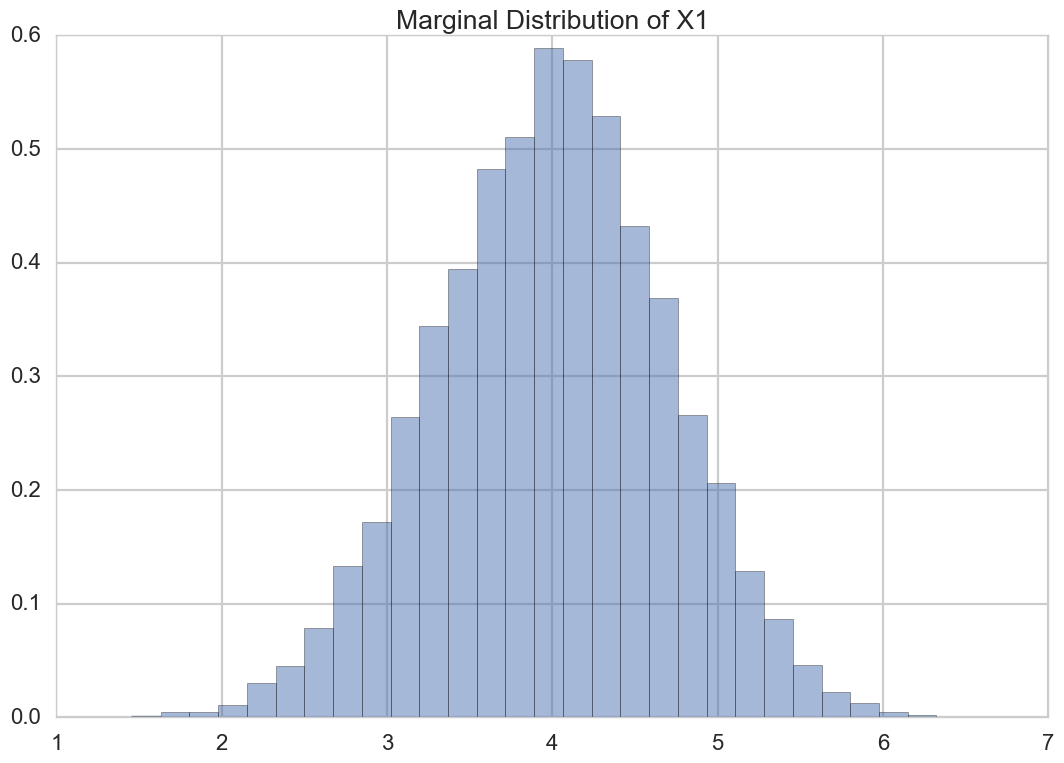

In [6]:
#print (data)
x1 = data[0]
x2 = data[1]
con_x2 = list()
#print (data.shape)
#s = 0

# For conditional distribution
for i in range(len(x1)):
    if (x1[i]>=3.99 and x1[i]<=4.01):
        con_x2.append(x2[i])
        
plt.hist(con_x2, bins=30, normed=True, alpha=0.5)
plt.title('Conditional Distribution of X2|X1')
plt.show()

# For marginal distribution
plt.hist(x1,bins=30, normed=True, alpha=0.5)
plt.title('Marginal Distribution of X1')
plt.show()

### Solution to  Part (B):



mean of the marginal distribution 3.99278088246
standard error(SE) of the marginal distribution 0.00696365688468


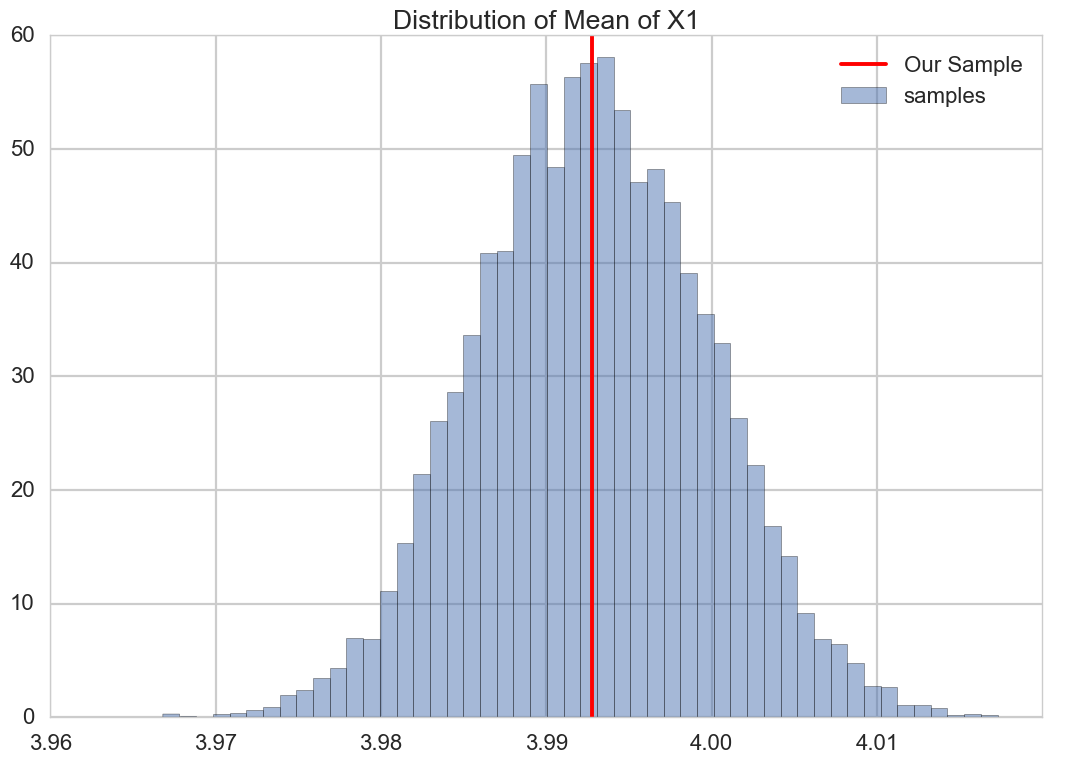

In [7]:
M_samples=10000
random.seed(1)
N_points = data.shape[0]
#print (data[0].shape)
bs_np = np.random.choice(data[0], size=(M_samples, N_points), replace=True)
sd_mean=np.mean(bs_np, axis=1)
plt.hist(sd_mean, bins=50, normed=1, alpha=0.5,label="samples")
plt.axvline(np.mean(data[0]), 0, 1, color='r', label='Our Sample')
plt.legend()

plt.title('Distribution of Mean of X1')
print ('mean of the marginal distribution',np.mean(sd_mean))

x1_se = np.std(sd_mean)
print ('standard error(SE) of the marginal distribution',x1_se)

standard deviation of the conditional distribution 0.733448155836
standard error(SE) of the conditional distribution 0.0392587137688


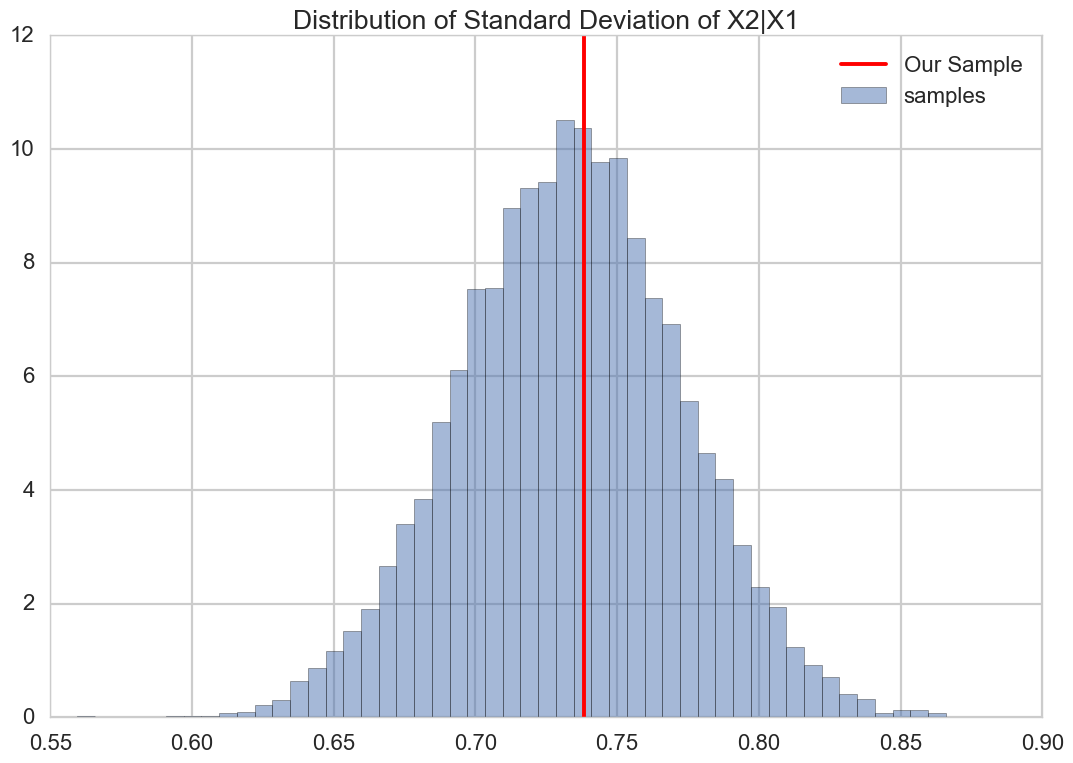

In [8]:
#mean_con_x2 = np.mean(con_x2)
M_samples=10000
random.seed(100)
N_points = len(con_x2)
#print ('The number of samples',N_points)
bs_np = np.random.choice(con_x2, size=(M_samples, N_points), replace=True)
sd_mean=np.mean(bs_np, axis=1)
sd_std=np.std(bs_np, axis=1)


#print ('mean of the conditional distribution',np.mean(con_x2))
con_std = np.mean(sd_std)
con_se = np.std(sd_std)
print ('standard deviation of the conditional distribution',con_std)
print ('standard error(SE) of the conditional distribution',con_se)
plt.hist(sd_std, bins=50, normed=1, alpha=0.5,label="samples")
plt.axvline(np.std(con_x2), 0, 1, color='r', label='Our Sample')
plt.title('Distribution of Standard Deviation of X2|X1')
plt.legend()
plt.show()


Given the SE compared with the estimate standard deviation of X2|X1,  after $0.734\dots \pm 0.039\dots$, the first decimal .7 is stable (basically would not be changed), so the number of significant digits should be 1